In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Embedding, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)
tf.random.set_seed(0)

/Users/imac/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:

X = pd.read_csv("rand_mdim_sample_100_X", index_col=False)
y = pd.read_csv("rand_mdim_sample_100_y", index_col=False)

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train = X_train[:10]
y_train = y_train[:10]
X_test = X_test[:4]
y_test = y_test[:4]


In [3]:

print(f'The training set has {len(X_train)} samples.')
print(f'The test set has {len(X_test)} samples.')

The training set has 10 samples.
The test set has 4 samples.


In [4]:


print(X_train.shape)
print(X_test.shape)

(10, 150000)
(4, 150000)


In [5]:
## Create your LSTM RNN
#
# Define "layers_lstm", a list of Keras layers, that you will then use to create a Sequential model
# saved as "rnn_lstm".
#
# Here you will create an RNN using an LSTM layer, again, with dropout and recurrent_dropout.
#
# Use an input Embedding layer and output Dense layer, as in the simple RNN and the GRU model.

layers_lstm = [
    tf.keras.layers.Embedding(150000, 128),
    tf.keras.layers.LSTM(128, recurrent_dropout=0.1, dropout=0.1),
    tf.keras.layers.Dense(1, activation="tanh")
    ]

rnn_lstm = tf.keras.models.Sequential(layers_lstm)

In [6]:

n_epochs = 2

rnn_lstm.compile(loss='mse', optimizer='adam', metrics=['root_mean_squared_error'])
history_lstm = rnn_lstm.fit(X_train, y_train,
                            validation_data=(X_test, y_test),
                            batch_size=32, epochs=n_epochs)

Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 731s 731s/step - loss: 61.9448 - root_mean_squared_error: 7.8705 - val_loss: 13.4779 - val_root_mean_squared_error: 3.6712
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 746s 746s/step - loss: 61.1903 - root_mean_squared_error: 7.8224 - val_loss: 13.0515 - val_root_mean_squared_error: 3.6127
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 618s 618s/step - loss: 60.2756 - root_mean_squared_error: 7.7637 - val_loss: 12.5098 - val_root_mean_squared_error: 3.5369


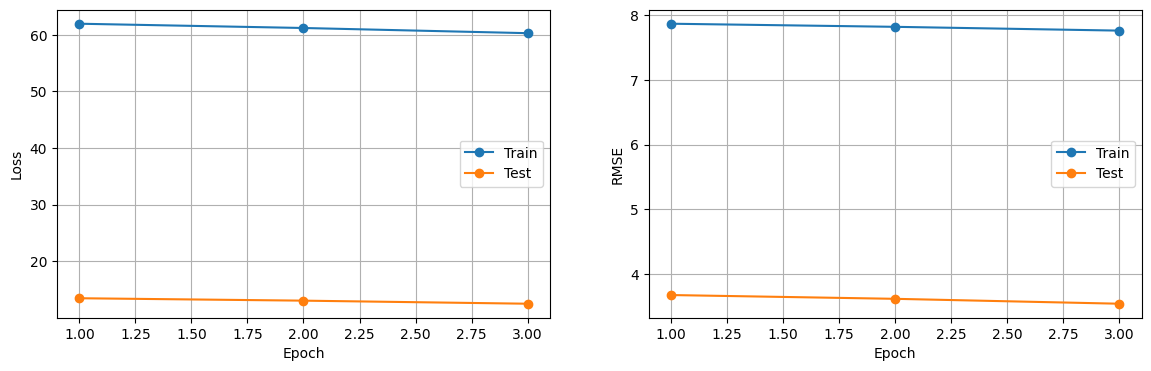

In [7]:
# Plot the loss and accuracy as a function of training epoch

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(np.arange(1, n_epochs+1), history_lstm.history['loss'], '-o', label='Train')
plt.plot(np.arange(1, n_epochs+1), history_lstm.history['val_loss'], '-o', label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(np.arange(1, n_epochs+1), history_lstm.history['root_mean_squared_error'], '-o', label='Train')
plt.plot(np.arange(1, n_epochs+1), history_lstm.history['val_root_mean_squared_error'], '-o', label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.grid(True)

In [8]:
# Apply the Model.evaluate() methods of your models to the test set and save the
# returned losses and accuracies to the corresponding variable names:
#   loss_simple, loss_gru, loss_lstm
#   acc_simple, acc_gru, acc_lstm
#
# Note that these values should be very close to the losses/accuracies in the
# plots created above, for the final epoch.

#loss_simple, acc_simple = rnn_simple.evaluate(X_test, y_test)
#loss_gru, acc_gru = rnn_gru.evaluate(X_test, y_test)
loss_lstm, acc_lstm = rnn_lstm.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 12.5098 - root_mean_squared_error: 3.5369


In [9]:
#print(f"Your simple model achieved an rmse of {acc_simple:.4}.")
#print(f"Your GRU model achieved an accuracy of {acc_gru:.2}.")
print(f"Your LSTM model achieved an rmse of {acc_lstm:.4}.")

Your LSTM model achieved an rmse of 3.537.


In [11]:
model_json = rnn_lstm.to_json()
with open("RNN_LSTM_1.json", "w") as json_file:
    json_file.write(model_json)
rnn_lstm.save_weights("RNN_LSTM_1.weights.h5")